## Facultad de Ingeniería
## Universidad Nacional Autónoma de México
### Ingeniería Geofísica

### Geofísica Matemática y Computacional
####   Profesor: Luis Miguel de la Cruz Salas



Examen parcial 2

Hernández Terán Oscar

Entrega: Ma 15-Dic-2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Aproximar la soluciòn $y(t)$ al problema: 

$ \frac{dy(t)}{dt} = -\lambda y(t)$ para  $0 \leq t \leq T_{max}$

Sujeto a la condición inicial $y(0) = y_0$

In [2]:
# Funciones necesarias para el funcionamiento del programa
def mesh (a , b , Nt ):
    """
    Esta funciòn genera el valor del tamaño de paso para el dominio dado.
    
    Paràmetros:
    ----------------------
    Entrada:
        Int. a
        Valor inicial en el tiempo.
        Int. b
        Valor final en el tiempo.
        Int. Nt
        Nùmero de pasos de tiempo.
    Salida:
        Float. ht
        Tamaño de paso.
    """
    ht = (b - a) / Nt
    return ht

def exactSolution (t , y0 , lam ):
    """
    Esta funciòn genera la soluciòn exacta al problema.
    Paràmetros
    -------------------------
    Entrada:
        Float. t
        Vector de tiempo.
        Float. y
        Cantidad de sustancia inicial.
        Float. lam
        Constante Lambda de la ecuación.
    Salida:
        Float. 
        Retorna la soluciòn exacta.
    """
    return y0 * np.exp (- lam * t)


def forwardEuler (y , ht , lam ):
    """
    Esta función genera la aproximación de la solución a través del algoritmo de Euler hacia adelante.    
    Paràmetros
    -------------------------
    Entrada:
        Float. y
        Vector con la condicion inicial.
        Float. ht
        Tamaño de paso de tiempo.
        Float. lam
        Constante Lambda de la ecuación.
    Salida:
        Float. An
        Aproximación a la solución de la ecuación.
    """
    A = 1 - ht * lam
    An = [A]
    for i , val in enumerate (y [0: -1]):
        y[i +1] = A * y[i ]
        An.append ( An [i] * A)
    return An


def backwardEuler (y , ht , lam ):
    """
    Esta función genera la aproximación de la solución a través del algoritmo de Euler hacia atrás. 
    Paràmetros
    -------------------------
    Entrada:
        Float. y
        Cantidad de sustancia inicial.
        Float. ht
        Malla generada por la función mesh.
        Float. lam
        Constante Lambda de la ecuación.
    Salida:
        Float. Bn
        Aproximación a la solución de la ecuación.
    """
    B = 1 /(1 + ht * lam )
    Bn = [B]
    for i , val in enumerate (y [0: -1]):
        y[i +1] = B * y[i ]
        Bn.append ( Bn [i] * B)
    return Bn

### !--------------------------------------!
#### N = 7
### !--------------------------------------!

In [3]:
# Número de pasos de tiempo
Nt = 7
# Tiempo final
Tmax = 10
# Llamado a función para crear tamaño de paso
ht = mesh(0 , Tmax , Nt )
# Condiciones iniciales
y0 = 20
lam = 1.5
# Vector de tiempo
t = np.linspace(0 , Tmax , Nt +1)
yf = np.zeros(Nt +1)
yb = np.zeros(Nt +1)
# Ajuste de las condiciones iniciales
yf[0] = y0
yb[0] = y0
# Llamado a funciones para la aproximación
An = forwardEuler(yf , ht , lam )
Bn = backwardEuler(yb , ht , lam )
# Calculo de soluciones exactas
tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution( tl , y0 , lam )
y_exac_p = exactSolution(t , y0 , lam )
# Calculo de los errores
norma_error_f = np.linalg.norm( yf - y_exac_p ,2)
norma_error_b = np.linalg.norm( yb - y_exac_p ,2)

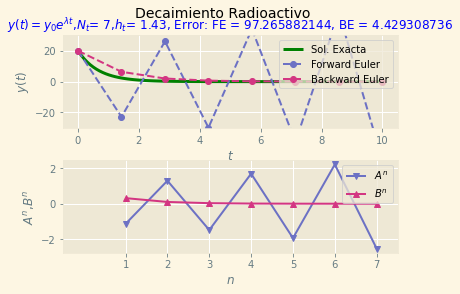

In [4]:
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + ',$h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)
plt.style.use(['Solarize_Light2'])
fig, (ax1 , ax2) = plt.subplots(2 ,1)
fig.suptitle('Decaimiento Radioactivo ', fontsize =14)
ax1.plot(tl , y_exacta , 'g-', lw=3, label = 'Sol. Exacta')
ax1.plot(t , yf , 'C7o--', label = 'Forward Euler')
ax1.plot(t , yb , 'C6o--', label = 'Backward Euler')
ax1.set_title( Ecuacion + Error , fontsize =12 , color = 'blue')
ax1.set_xlim(-0.5, t[-1]+0.5)
ax1.set_ylim(-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc = 'upper right', ncol =1 , framealpha =0.75, fancybox =True, fontsize =10)
ax1.grid(color = 'w')
nticks = np.arange(1 ,Nt +1 ,1)
ax2.plot(nticks , An[:-1] , 'C7v-', label = '$A^n$')
ax2.plot(nticks , Bn[:-1] , 'C6^-', label = '$B^n$')
ax2.set_xlim(-0.5 , Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$,$B^n$')
ax2.legend(loc = 'upper right', ncol=1, framealpha=0.75, fancybox= True, fontsize =10)
ax2.grid(color = 'w')
plt.subplots_adjust(hspace=0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

### !--------------------------------------!
#### N = 8
### !--------------------------------------!

In [5]:
# Número de pasos de tiempo
Nt = 8
# Tiempo final
Tmax = 10
# Llamado a función para crear tamaño de paso
ht = mesh(0 , Tmax , Nt )
# Vector de tiempo
t = np.linspace(0 , Tmax , Nt +1)
yf = np.zeros(Nt +1)
yb = np.zeros(Nt +1)
# Ajuste de las condiciones iniciales
yf[0] = y0
yb[0] = y0
# Llamado a funciones para la aproximación
An = forwardEuler(yf , ht , lam )
Bn= backwardEuler(yb , ht , lam )

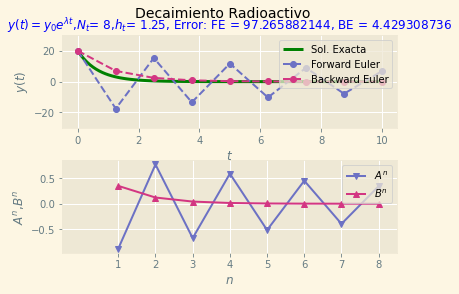

In [6]:
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + ',$h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)
plt.style.use(['Solarize_Light2'])
fig, (ax1 , ax2) = plt.subplots(2 ,1)
fig.suptitle('Decaimiento Radioactivo ', fontsize =14)
ax1.plot(tl , y_exacta , 'g-', lw=3, label = 'Sol. Exacta')
ax1.plot(t , yf , 'C7o--', label = 'Forward Euler')
ax1.plot(t , yb , 'C6o--', label = 'Backward Euler')
ax1.set_title( Ecuacion + Error , fontsize =12 , color = 'blue')
ax1.set_xlim(-0.5, t[-1]+0.5)
ax1.set_ylim(-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc = 'upper right', ncol =1 , framealpha =0.75, fancybox =True, fontsize =10)
ax1.grid(color = 'w')
nticks = np.arange(1 ,Nt +1 ,1)
ax2.plot(nticks , An[:-1] , 'C7v-', label = '$A^n$')
ax2.plot(nticks , Bn[:-1] , 'C6^-', label = '$B^n$')
ax2.set_xlim(-0.5 , Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$,$B^n$')
ax2.legend(loc = 'upper right', ncol=1, framealpha=0.75, fancybox= True, fontsize =10)
ax2.grid(color = 'w')
plt.subplots_adjust(hspace=0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

### !--------------------------------------!
#### N = 9
### !--------------------------------------!

In [7]:
# Número de pasos de tiempo
Nt = 9
# Tiempo final
Tmax = 10
# Llamado a función para crear tamaño de paso
ht = mesh(0 , Tmax , Nt )
# Vector de tiempo
t = np.linspace(0 , Tmax , Nt +1)
yf = np.zeros(Nt +1)
yb = np.zeros(Nt +1)
# Ajuste de las condiciones iniciales
yf[0] = y0
yb[0] = y0
# Llamado a funciones para la aproximación
An = forwardEuler(yf , ht , lam )
Bn= backwardEuler(yb , ht , lam )

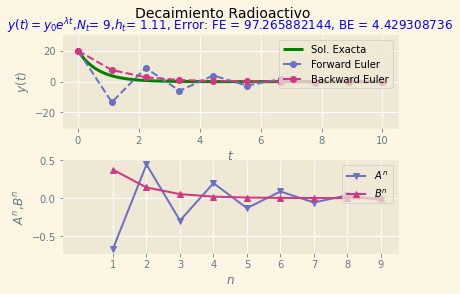

In [8]:
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + ',$h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)
plt.style.use(['Solarize_Light2'])
fig, (ax1 , ax2) = plt.subplots(2 ,1)
fig.suptitle('Decaimiento Radioactivo ', fontsize =14)
ax1.plot(tl , y_exacta , 'g-', lw=3, label = 'Sol. Exacta')
ax1.plot(t , yf , 'C7o--', label = 'Forward Euler')
ax1.plot(t , yb , 'C6o--', label = 'Backward Euler')
ax1.set_title( Ecuacion + Error , fontsize =12 , color = 'blue')
ax1.set_xlim(-0.5, t[-1]+0.5)
ax1.set_ylim(-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc = 'upper right', ncol =1 , framealpha =0.75, fancybox =True, fontsize =10)
ax1.grid(color = 'w')
nticks = np.arange(1 ,Nt +1 ,1)
ax2.plot(nticks , An[:-1] , 'C7v-', label = '$A^n$')
ax2.plot(nticks , Bn[:-1] , 'C6^-', label = '$B^n$')
ax2.set_xlim(-0.5 , Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$,$B^n$')
ax2.legend(loc = 'upper right', ncol=1, framealpha=0.75, fancybox= True, fontsize =10)
ax2.grid(color = 'w')
plt.subplots_adjust(hspace=0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

### !--------------------------------------!
#### N = 10
### !--------------------------------------!

In [9]:
# Número de pasos de tiempo
Nt = 10
# Tiempo final
Tmax = 10
# Llamado a función para crear tamaño de paso
ht = mesh(0 , Tmax , Nt )
# Vector de tiempo
t = np.linspace(0 , Tmax , Nt +1)
yf = np.zeros(Nt +1)
yb = np.zeros(Nt +1)
# Ajuste de las condiciones iniciales
yf[0] = y0
yb[0] = y0
# Llamado a funciones para la aproximación
An = forwardEuler(yf , ht , lam )
Bn= backwardEuler(yb , ht , lam )

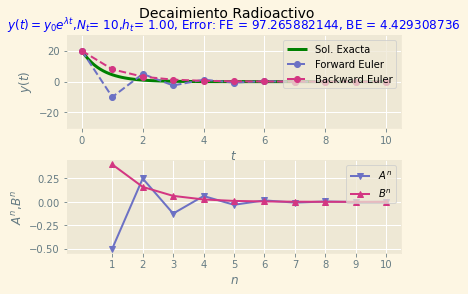

In [10]:
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + ',$h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)
plt.style.use(['Solarize_Light2'])
fig, (ax1 , ax2) = plt.subplots(2 ,1)
fig.suptitle('Decaimiento Radioactivo ', fontsize =14)
ax1.plot(tl , y_exacta , 'g-', lw=3, label = 'Sol. Exacta')
ax1.plot(t , yf , 'C7o--', label = 'Forward Euler')
ax1.plot(t , yb , 'C6o--', label = 'Backward Euler')
ax1.set_title( Ecuacion + Error , fontsize =12 , color = 'blue')
ax1.set_xlim(-0.5, t[-1]+0.5)
ax1.set_ylim(-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc = 'upper right', ncol =1 , framealpha =0.75, fancybox =True, fontsize =10)
ax1.grid(color = 'w')
nticks = np.arange(1 ,Nt +1 ,1)
ax2.plot(nticks , An[:-1] , 'C7v-', label = '$A^n$')
ax2.plot(nticks , Bn[:-1] , 'C6^-', label = '$B^n$')
ax2.set_xlim(-0.5 , Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$,$B^n$')
ax2.legend(loc = 'upper right', ncol=1, framealpha=0.75, fancybox= True, fontsize =10)
ax2.grid(color = 'w')
plt.subplots_adjust(hspace=0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

### !--------------------------------------!
#### N = 20
### !--------------------------------------!

In [11]:
# Número de pasos de tiempo
Nt = 20
# Tiempo final
Tmax = 10
# Llamado a función para crear tamaño de paso
ht = mesh(0 , Tmax , Nt )
# Vector de tiempo
t = np.linspace(0 , Tmax , Nt +1)
yf = np.zeros(Nt +1)
yb = np.zeros(Nt +1)
# Ajuste de las condiciones iniciales
yf[0] = y0
yb[0] = y0
# Llamado a funciones para la aproximación
An = forwardEuler(yf , ht , lam )
Bn= backwardEuler(yb , ht , lam )

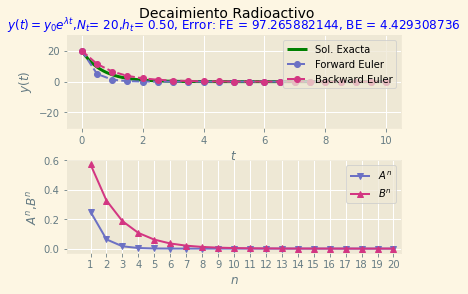

In [12]:
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + ',$h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)
plt.style.use(['Solarize_Light2'])
fig, (ax1 , ax2) = plt.subplots(2 ,1)
fig.suptitle('Decaimiento Radioactivo ', fontsize =14)
ax1.plot(tl , y_exacta , 'g-', lw=3, label = 'Sol. Exacta')
ax1.plot(t , yf , 'C7o--', label = 'Forward Euler')
ax1.plot(t , yb , 'C6o--', label = 'Backward Euler')
ax1.set_title( Ecuacion + Error , fontsize =12 , color = 'blue')
ax1.set_xlim(-0.5, t[-1]+0.5)
ax1.set_ylim(-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc = 'upper right', ncol =1 , framealpha =0.75, fancybox =True, fontsize =10)
ax1.grid(color = 'w')
nticks = np.arange(1 ,Nt +1 ,1)
ax2.plot(nticks , An[:-1] , 'C7v-', label = '$A^n$')
ax2.plot(nticks , Bn[:-1] , 'C6^-', label = '$B^n$')
ax2.set_xlim(-0.5 , Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$,$B^n$')
ax2.legend(loc = 'upper right', ncol=1, framealpha=0.75, fancybox= True, fontsize =10)
ax2.grid(color = 'w')
plt.subplots_adjust(hspace=0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

### !--------------------------------------!
#### Inciso e)
1.FE converge en: 8

2.FE deja de oscilar en: 15

3.BE tiene un error menor a 3 en: Para este caso, BE no presenta un error mayor a 3, aun utilizando 1 nodo.

4.FE tiene un error menor a 3 en: 9
### !--------------------------------------!

In [13]:
# Número de pasos de tiempo
Nt = 8
# Tiempo final
Tmax = 10
# Llamado a función para crear tamaño de paso
ht = mesh(0 , Tmax , Nt )
# Condiciones iniciales
y0 = 2
lam = 1.5
# Vector de tiempo
t = np.linspace(0 , Tmax , Nt +1)
yf = np.zeros(Nt +1)
yb = np.zeros(Nt +1)
# Ajuste de las condiciones iniciales
yf[0] = y0
yb[0] = y0
# Llamado a funciones para la aproximación
An = forwardEuler(yf , ht , lam )
Bn= backwardEuler(yb , ht , lam )
# Calculo de soluciones exactas
tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution( tl , y0 , lam )
y_exac_p = exactSolution(t , y0 , lam )
# Calculo de los errores
norma_error_f = np.linalg.norm( yf - y_exac_p ,2)
norma_error_b = np.linalg.norm( yb - y_exac_p ,2)

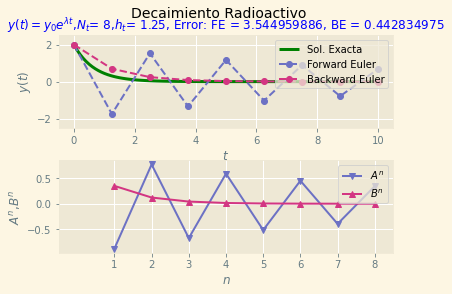

In [14]:
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + ',$h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)
plt.style.use(['Solarize_Light2'])
fig, (ax1 , ax2) = plt.subplots(2 ,1)
fig.suptitle('Decaimiento Radioactivo ', fontsize =14)
ax1.plot(tl , y_exacta , 'g-', lw=3, label = 'Sol. Exacta')
ax1.plot(t , yf , 'C7o--', label = 'Forward Euler')
ax1.plot(t , yb , 'C6o--', label = 'Backward Euler')
ax1.set_title( Ecuacion + Error , fontsize =12 , color = 'blue')
ax1.set_xlim(-0.5, t[-1]+0.5)
ax1.set_ylim(-2.5,2.5)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc = 'upper right', ncol =1 , framealpha =0.75, fancybox =True, fontsize =10)
ax1.grid(color = 'w')
nticks = np.arange(1 ,Nt +1 ,1)
ax2.plot(nticks , An[:-1] , 'C7v-', label = '$A^n$')
ax2.plot(nticks , Bn[:-1] , 'C6^-', label = '$B^n$')
ax2.set_xlim(-0.5 , Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$,$B^n$')
ax2.legend(loc = 'upper right', ncol=1, framealpha=0.75, fancybox= True, fontsize =10)
ax2.grid(color = 'w')
plt.subplots_adjust(hspace=0.35)
plt.savefig('decaimiento_y0_{}.pdf'.format(y0))
plt.show()

In [15]:
# Número de pasos de tiempo
Nt = 15
# Tiempo final
Tmax = 10
# Llamado a función para crear tamaño de paso
ht = mesh(0 , Tmax , Nt )
# Condiciones iniciales
y0 = 2
lam = 1.5
# Vector de tiempo
t = np.linspace(0 , Tmax , Nt +1)
yf = np.zeros(Nt +1)
yb = np.zeros(Nt +1)
# Ajuste de las condiciones iniciales
yf[0] = y0
yb[0] = y0
# Llamado a funciones para la aproximación
An = forwardEuler(yf , ht , lam )
Bn= backwardEuler(yb , ht , lam )
# Calculo de soluciones exactas
tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution( tl , y0 , lam )
y_exac_p = exactSolution(t , y0 , lam )
# Calculo de los errores
norma_error_f = np.linalg.norm( yf - y_exac_p ,2)
norma_error_b = np.linalg.norm( yb - y_exac_p ,2)

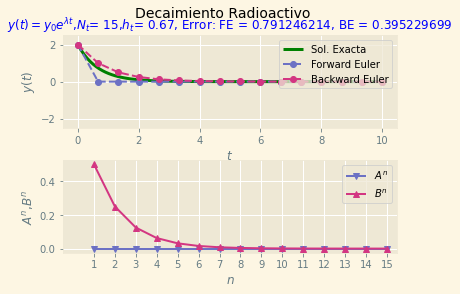

In [16]:
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + ',$h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)
plt.style.use(['Solarize_Light2'])
fig, (ax1 , ax2) = plt.subplots(2 ,1)
fig.suptitle('Decaimiento Radioactivo ', fontsize =14)
ax1.plot(tl , y_exacta , 'g-', lw=3, label = 'Sol. Exacta')
ax1.plot(t , yf , 'C7o--', label = 'Forward Euler')
ax1.plot(t , yb , 'C6o--', label = 'Backward Euler')
ax1.set_title( Ecuacion + Error , fontsize =12 , color = 'blue')
ax1.set_xlim(-0.5, t[-1]+0.5)
ax1.set_ylim(-2.5,2.5)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc = 'upper right', ncol =1 , framealpha =0.75, fancybox =True, fontsize =10)
ax1.grid(color = 'w')
nticks = np.arange(1 ,Nt +1 ,1)
ax2.plot(nticks , An[:-1] , 'C7v-', label = '$A^n$')
ax2.plot(nticks , Bn[:-1] , 'C6^-', label = '$B^n$')
ax2.set_xlim(-0.5 , Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$,$B^n$')
ax2.legend(loc = 'upper right', ncol=1, framealpha=0.75, fancybox= True, fontsize =10)
ax2.grid(color = 'w')
plt.subplots_adjust(hspace=0.35)
plt.savefig('decaimiento_y0_{}.pdf'.format(y0))
plt.show()

In [17]:
# Número de pasos de tiempo
Nt = 1
# Tiempo final
Tmax = 10
# Llamado a función para crear tamaño de paso
ht = mesh(0 , Tmax , Nt )
# Condiciones iniciales
y0 = 2
lam = 1.5
# Vector de tiempo
t = np.linspace(0 , Tmax , Nt +1)
yf = np.zeros(Nt +1)
yb = np.zeros(Nt +1)
# Ajuste de las condiciones iniciales
yf[0] = y0
yb[0] = y0
# Llamado a funciones para la aproximación
An = forwardEuler(yf , ht , lam )
Bn= backwardEuler(yb , ht , lam )
# Calculo de soluciones exactas
tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution( tl , y0 , lam )
y_exac_p = exactSolution(t , y0 , lam )
# Calculo de los errores
norma_error_f = np.linalg.norm( yf - y_exac_p ,2)
norma_error_b = np.linalg.norm( yb - y_exac_p ,2)

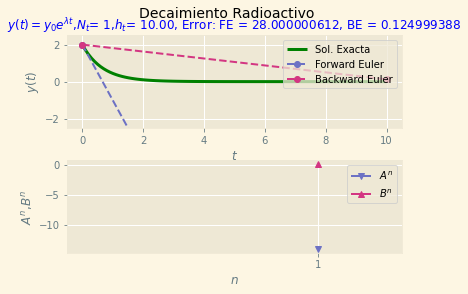

In [18]:
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + ',$h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)
plt.style.use(['Solarize_Light2'])
fig, (ax1 , ax2) = plt.subplots(2 ,1)
fig.suptitle('Decaimiento Radioactivo ', fontsize =14)
ax1.plot(tl , y_exacta , 'g-', lw=3, label = 'Sol. Exacta')
ax1.plot(t , yf , 'C7o--', label = 'Forward Euler')
ax1.plot(t , yb , 'C6o--', label = 'Backward Euler')
ax1.set_title( Ecuacion + Error , fontsize =12 , color = 'blue')
ax1.set_xlim(-0.5, t[-1]+0.5)
ax1.set_ylim(-2.5,2.5)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc = 'upper right', ncol =1 , framealpha =0.75, fancybox =True, fontsize =10)
ax1.grid(color = 'w')
nticks = np.arange(1 ,Nt +1 ,1)
ax2.plot(nticks , An[:-1] , 'C7v-', label = '$A^n$')
ax2.plot(nticks , Bn[:-1] , 'C6^-', label = '$B^n$')
ax2.set_xlim(-0.5 , Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$,$B^n$')
ax2.legend(loc = 'upper right', ncol=1, framealpha=0.75, fancybox= True, fontsize =10)
ax2.grid(color = 'w')
plt.subplots_adjust(hspace=0.35)
plt.savefig('decaimiento_y0_{}.pdf'.format(y0))
plt.show()

In [19]:
# Número de pasos de tiempo
Nt = 9
# Tiempo final
Tmax = 10
# Llamado a función para crear tamaño de paso
ht = mesh(0 , Tmax , Nt )
# Condiciones iniciales
y0 = 2
lam = 1.5
# Vector de tiempo
t = np.linspace(0 , Tmax , Nt +1)
yf = np.zeros(Nt +1)
yb = np.zeros(Nt +1)
# Ajuste de las condiciones iniciales
yf[0] = y0
yb[0] = y0
# Llamado a funciones para la aproximación
An = forwardEuler(yf , ht , lam )
Bn= backwardEuler(yb , ht , lam )
# Calculo de soluciones exactas
tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution( tl , y0 , lam )
y_exac_p = exactSolution(t , y0 , lam )
# Calculo de los errores
norma_error_f = np.linalg.norm( yf - y_exac_p ,2)
norma_error_b = np.linalg.norm( yb - y_exac_p ,2)

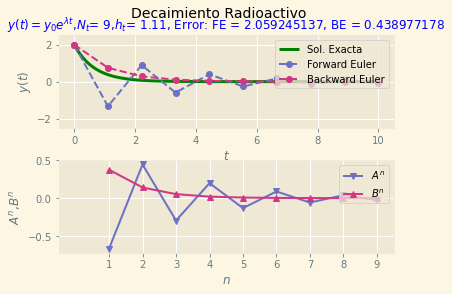

In [20]:
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + ',$h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)
plt.style.use(['Solarize_Light2'])
fig, (ax1 , ax2) = plt.subplots(2 ,1)
fig.suptitle('Decaimiento Radioactivo ', fontsize =14)
ax1.plot(tl , y_exacta , 'g-', lw=3, label = 'Sol. Exacta')
ax1.plot(t , yf , 'C7o--', label = 'Forward Euler')
ax1.plot(t , yb , 'C6o--', label = 'Backward Euler')
ax1.set_title( Ecuacion + Error , fontsize =12 , color = 'blue')
ax1.set_xlim(-0.5, t[-1]+0.5)
ax1.set_ylim(-2.5,2.5)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc = 'upper right', ncol =1 , framealpha =0.75, fancybox =True, fontsize =10)
ax1.grid(color = 'w')
nticks = np.arange(1 ,Nt +1 ,1)
ax2.plot(nticks , An[:-1] , 'C7v-', label = '$A^n$')
ax2.plot(nticks , Bn[:-1] , 'C6^-', label = '$B^n$')
ax2.set_xlim(-0.5 , Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$,$B^n$')
ax2.legend(loc = 'upper right', ncol=1, framealpha=0.75, fancybox= True, fontsize =10)
ax2.grid(color = 'w')
plt.subplots_adjust(hspace=0.35)
plt.savefig('decaimiento_y0_{}.pdf'.format(y0))
plt.show()